# 作業目標:¶
利用手寫辨識資料說明MLP 中, 神經網路層的多寡跟預測結果的差異

# 作業重點:
## [練習] 請嘗試新增一層或兩層看看最後預測結果是否有差異
model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu'))


# 資料預處理

In [1]:
from keras.utils import np_utils
import numpy as np
# 設定seed讓每次需要隨機產生的資料都有相同的輸出：
np.random.seed(10) 

Using TensorFlow backend.


In [2]:
# 載入手寫辨識的資料集
# 匯入mnist模組用以下載並讀取mnist資料，利用mnist.load_data()下載資料
from keras.datasets import mnist
(x_train_image,y_train_label),\
(x_test_image,y_test_label)= mnist.load_data()

In [3]:
# 指定測試集與訓練資料集
# 將features(特徵值)使用reshape轉換
# 原本的影像是一個2維的28x28個數值，現在要把它reshape成1維的784個數值，並以float為數字格式：
x_Train =x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

In [4]:
# normalize inputs from 0-255 to 0-1
# 將features標準化
# 圖像數值原本是0到255，將數值除以255，可以使數值介於0到1
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

In [5]:
# 把LABEL轉成NUMERICAL Categorical 
# labe以one-hot encoding轉換
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

# 建立模型

## 1.建立模型(Model)：
首先，我們要確立Input格式、要經過幾層處理、每一層要作甚麼處理，例如以下程式：

- 參考來源:https://ithelp.ithome.com.tw/articles/10191725

- 參考來源: https://www.facebook.com/notes/chia-yao-chen/%E7%AD%86%E8%A8%98-mnist%E7%B7%B4%E7%BF%92-part-2-%E5%BB%BA%E7%AB%8B%E5%A4%9A%E5%B1%A4%E6%84%9F%E7%9F%A5%E5%99%A8mlp/10155017917842581/

In [6]:
# 匯入需要用到的模組
from keras.models import Sequential
from keras.layers import Dense

In [7]:
# 宣告採用序列模型
# 建立一個線性堆疊的模型
model = Sequential()

'''
說明:
依據官方文件 說明，Keras 提供兩種模型，
Sequential Model (順序式模型)與 Functional API。

1.Sequential Model (順序式模型)：
就是一種簡單的模型，單一輸入、單一輸出，
按順序一層(Dense)一層的由上往下執行。
2.Functional API：支援多個輸入、多個輸出。
'''
# 建構輸入層，隱藏層(hidden layer) 有 256個輸出變數
'''
參數:
units=256: 建立有256個神經元的隱藏層
input_dim=784: 一開始的1維影像有784個數值
kernel_initializer='normal': 使用常態分佈的亂數來建立初始的weight與bias
activation='relu': 使用relu為激活函數
'''
model.add(Dense(units=256,  # 建立有256個神經元的隱藏層
                input_dim=784,  # 一開始的1維影像有784個數值
                kernel_initializer='normal',  # 使用常態分佈的亂數來建立初始的weight與bias
                activation='relu')) # 使用relu為激活函數
# 建構輸出層
'''
參數:
units=10:建立有10個神經元的輸出層，代表數字0到9
kernel_initializer='normal': 使用常態分佈的亂數來建立初始的weight與bias
activation='softmax': 使用softmax為激活函數，可以將每個神經元的輸出，轉換為預測每個數字的機率
'''
model.add(Dense(units=10, # 建立有10個神經元的輸出層，代表數字0到9
                kernel_initializer='normal',   # 使用常態分佈的亂數來建立初始的weight與bias
                activation='softmax')) # 使用softmax為激活函數，可以將每個神經元的輸出，轉換為預測每個數字的機率

#查看一下模型的摘要
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None


# 訓練模型

## 2.確立目標及求解方法：
以compile函數定義損失函數(loss)、優化函數(optimizer)及成效衡量指標(mertrics)。

- 參考來源:https://ithelp.ithome.com.tw/articles/10191725

- 參考來源: https://www.facebook.com/notes/chia-yao-chen/%E7%AD%86%E8%A8%98-mnist%E7%B7%B4%E7%BF%92-part-2-%E5%BB%BA%E7%AB%8B%E5%A4%9A%E5%B1%A4%E6%84%9F%E7%9F%A5%E5%99%A8mlp/10155017917842581/

In [8]:
#定義模型的訓練方式

'''
參數:
loss='categorical_crossentropy':設定損失函數，這邊使用cross entropy的效果比較好。
optimizer='adam': 使用adam為最優化方法。
metrics=['accuracy']:  設定評估模型的方式是準確率。
'''
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [9]:
# 進行訓練, 訓練過程會存在 train_history 變數中
'''
參數:
validation_split=0.2 : 設定將80%的資料作為訓練資料，20%的資料作為驗證資料。
epochs=10 : 設定跑10個訓練週期
batch_size= 32 : 設定每一批次抓取32筆資料。
verbose=2 : 設定顯示每一筆訓練過程
'''
train_history =model.fit(x=x_Train_normalize,
                         y=y_Train_OneHot,
                         validation_split=0.2, 
                         epochs=10,
                         batch_size=32,
                         verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 8s 157us/step - loss: 0.2700 - accuracy: 0.9223 - val_loss: 0.1332 - val_accuracy: 0.9611
Epoch 2/10
48000/48000 [==============================] - 7s 137us/step - loss: 0.1080 - accuracy: 0.9682 - val_loss: 0.1059 - val_accuracy: 0.9683
Epoch 3/10
48000/48000 [==============================] - 7s 143us/step - loss: 0.0713 - accuracy: 0.9779 - val_loss: 0.0924 - val_accuracy: 0.9726
Epoch 4/10
48000/48000 [==============================] - 7s 141us/step - loss: 0.0513 - accuracy: 0.9843 - val_loss: 0.0829 - val_accuracy: 0.9753
Epoch 5/10
48000/48000 [==============================] - 7s 149us/step - loss: 0.0372 - accuracy: 0.9876 - val_loss: 0.0798 - val_accuracy: 0.9761
Epoch 6/10
48000/48000 [==============================] - 7s 138us/step - loss: 0.0264 - accuracy: 0.9917 - val_loss: 0.0787 - val_accuracy: 0.9780
Epoch 7/10
48000/48000 [==============================] - 7s 1

# 以圖形顯示訓練過程

In [10]:
#手動建立一個函數顯示訓練結果
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train]) # 畫出訓練資料的執行結果
    plt.plot(train_history.history[validation]) # 畫出驗證資料的執行結果
    plt.title('Train History') # 顯示圖的標題
    plt.ylabel(train) # 設定y軸標籤
    plt.xlabel('Epoch') # 設定x軸標籤
    plt.legend(['train', 'validation'], loc='upper left') # 把圖例的位置放在左上角
    plt.show() # 把圖給畫出來
    plt.savefig('training_result.png')

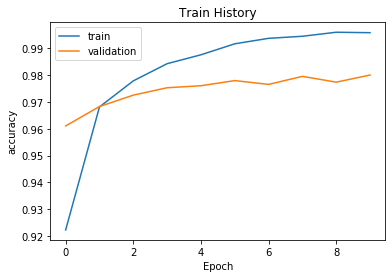

<Figure size 432x288 with 0 Axes>

In [11]:
# 接著利用前面建立的函數把accuracy的結果畫出來
show_train_history(train_history,'accuracy','val_accuracy')

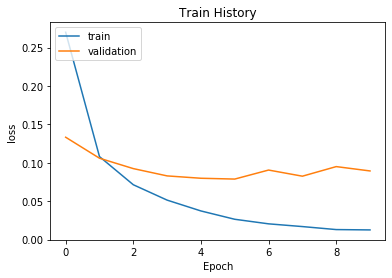

<Figure size 432x288 with 0 Axes>

In [12]:
# 接著利用前面建立的函數把loss的結果畫出來
show_train_history(train_history,'loss','val_loss')

# 評估模型準確率

In [13]:
#用測試資料來評估模型的準確率
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
# 輸出準確率
print('accuracy=',scores[1])

10000/10000 [==============================] - 1s 70us/step

accuracy= 0.9776999950408936


參考來源:https://www.facebook.com/notes/chia-yao-chen/%E7%AD%86%E8%A8%98-mnist%E7%B7%B4%E7%BF%92-part-2-%E5%BB%BA%E7%AB%8B%E5%A4%9A%E5%B1%A4%E6%84%9F%E7%9F%A5%E5%99%A8mlp/10155017917842581/